In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [4]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

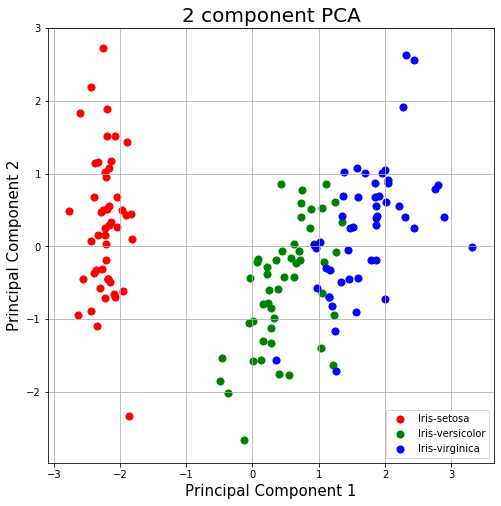

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [7]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

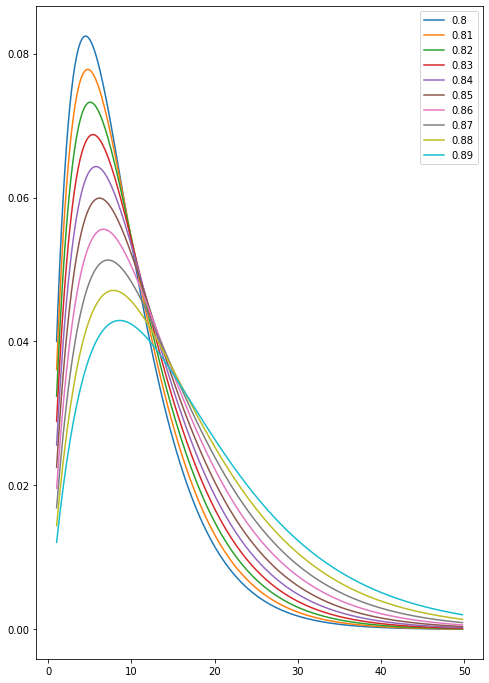

In [17]:
import numpy as np

x = np.arange(1,50,0.2)

fig = plt.figure(figsize = (8,12))
ax = fig.add_subplot(1,1,1) 

for p in np.arange(0.8,0.9,0.01):
    w = x * p**(x-1)*(p-1)**2
    ax.plot(x,w,label=f"{p:.2}")
    
plt.legend()

In [18]:
import pandas as pd

In [20]:
wgsr = pd.read_csv("thermo-wgsr.csv")

Text(0.5, 0, '$T$ / °C')

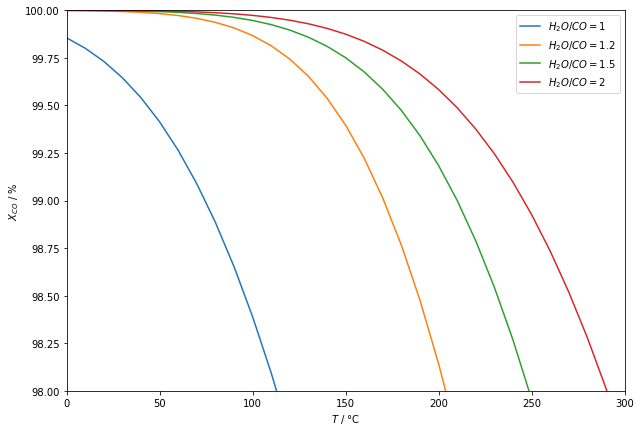

In [49]:
import numpy as np

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1) 

for ratio in [1,1.2,1.5,2]:
    current = wgsr.loc[wgsr['pH2O / pCO'] == ratio]    
    ax.plot(current["T / C"],current["X(CO)"]*100,label=f"$H_2O / CO =${ratio:}")

ax.legend()
ax.set_xlim(0,300)
ax.set_ylim(98,100)

ax.set_ylabel("$X_{CO}$ / %")
ax.set_xlabel("$T$ / °C")